In [199]:
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
#reading in the data we will work with and naming it 'data'
data = pd.read_csv('Coding project data.csv')

In [201]:
#chekcing the command works and previewing the first five rows of the imported data
print(data.head)

<bound method NDFrame.head of     Time (hours)    control  Test Variable 1
0       0.000000   892670.4         994871.2
1       0.316667   928789.0        1021873.0
2       0.566667   925736.1        1031470.0
3       0.816667   939420.3        1034910.0
4       1.066667   945954.7        1032228.0
..           ...        ...              ...
76     19.066667  1874872.0         204322.9
77     19.316667  1890403.0         201535.8
78     19.566667  1900229.0         198551.8
79     19.816667  1922294.0         192315.3
80     20.066667  1923473.0         193689.1

[81 rows x 3 columns]>


In [202]:
#we want to normalise everything after the second hour to the second hour.
#The second hour time point is on the 9th row. 
#therefore we would like to remove data before the 9th row. 
data_after_8th_row = data.iloc[8:]

In [203]:
#checking to see if the first 8 rows have been removed
print("Original DataFrame shape:", data.shape)
print("Modified DataFrame shape (after removing first 8 rows):", data_after_8th_row.shape)

Original DataFrame shape: (81, 3)
Modified DataFrame shape (after removing first 8 rows): (73, 3)


In [170]:
#now we want to normalise each row to the second hour time point (now the first row)
norm_columns = ['control', 'Test Variable 1']

In [90]:
#we will now nromalise each of the columns independently based on the first time point of the second hour
data_after_8th_row[norm_columns] = data_after_8th_row[norm_columns] / data_after_8th_row[norm_columns].loc

TypeError: unsupported operand type(s) for /: 'float' and '_LocIndexer'

In [171]:
#Display the first 5 rows of normalised data
print(data_after_8th_row.head())

    Time (hours)    control  Test Variable 1
8       2.066667   993197.0        1041702.0
9       2.316667  1003673.0        1039363.0
10      2.566667  1016048.0        1032583.0
11      2.816667  1038374.0        1036800.0
12      3.066667  1048978.0        1046555.0


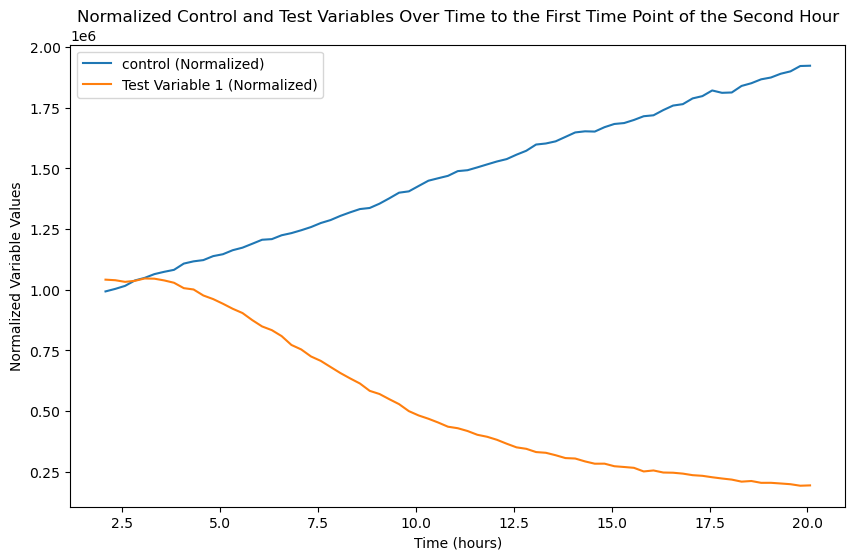

In [172]:
#plot the normalised data
plt.figure(figsize=(10, 6))
plt.plot(data_after_8th_row['Time (hours)'], data_after_8th_row['control'], label='control (Normalized)')
plt.plot(data_after_8th_row['Time (hours)'], data_after_8th_row['Test Variable 1'], label='Test Variable 1 (Normalized)')
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Variable Values')
plt.title('Normalized Control and Test Variables Over Time to the First Time Point of the Second Hour')
plt.legend()
plt.show()

In [173]:
#now we want to perform a rolling average on our two test columns.
#this code defines the columns we want to calculate the rolling average for. 
rolling_columns = ['control', 'Test Variable 1']

In [174]:
#This code performs the rolling average
for column in rolling_columns:
    data_after_8th_row.loc[:, column] = data_after_8th_row[column].rolling(window=3, min_periods=1).mean()

In [175]:
#Display the first few rows to inspect the output data
print(data_after_8th_row.head())

    Time (hours)       control  Test Variable 1
8       2.066667  9.931970e+05     1.041702e+06
9       2.316667  9.984350e+05     1.040532e+06
10      2.566667  1.004306e+06     1.037883e+06
11      2.816667  1.019365e+06     1.036249e+06
12      3.066667  1.034467e+06     1.038646e+06


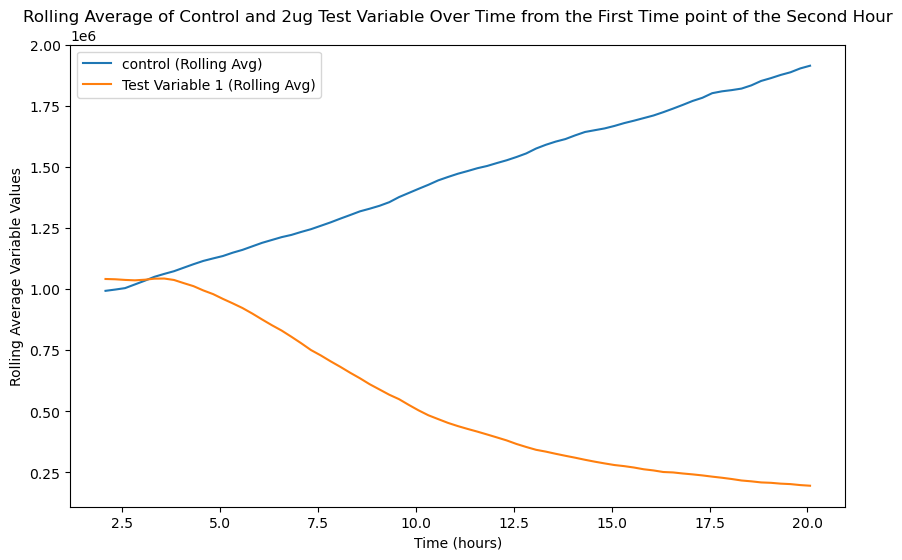

In [176]:
#plot the results
plt.figure(figsize=(10, 6))
plt.plot(data_after_8th_row['Time (hours)'], data_after_8th_row['control'], label='control (Rolling Avg)')
plt.plot(data_after_8th_row['Time (hours)'], data_after_8th_row['Test Variable 1'], label='Test Variable 1 (Rolling Avg)')
plt.xlabel('Time (hours)')
plt.ylabel('Rolling Average Variable Values')
plt.title('Rolling Average of Control and 2ug Test Variable Over Time from the First Time point of the Second Hour')
plt.legend()
plt.show()

In [177]:
#we now want to select a 6 hour timeframe where this slope of the curves is steapest as this is where the experiment is running optimally. 
#We will select time frames 6 to 12 hours. This is the 25th row to the 48th row. 
selected_rows = data_after_8th_row.loc[24:47]

In [178]:
#view the data 
print(selected_rows)

    Time (hours)       control  Test Variable 1
24      6.066667  1.189791e+06    875943.033333
25      6.316667  1.201526e+06    852417.066667
26      6.566667  1.213191e+06    830461.100000
27      6.816667  1.222308e+06    805003.200000
28      7.066667  1.234500e+06    778513.700000
29      7.316667  1.245758e+06    750558.466667
30      7.566667  1.259618e+06    728660.766667
31      7.816667  1.273618e+06    704552.933333
32      8.066667  1.288972e+06    681798.433333
33      8.316667  1.303672e+06    657726.700000
34      8.566667  1.318786e+06    635034.533333
35      8.816667  1.329664e+06    610546.700000
36      9.066667  1.341554e+06    589134.000000
37      9.316667  1.356291e+06    567581.833333
38      9.566667  1.377298e+06    549313.200000
39      9.816667  1.394218e+06    525771.666667
40     10.066667  1.411176e+06    503430.766667
41     10.316667  1.427639e+06    483366.466667
42     10.566667  1.445662e+06    467704.366667
43     10.816667  1.459607e+06    452233

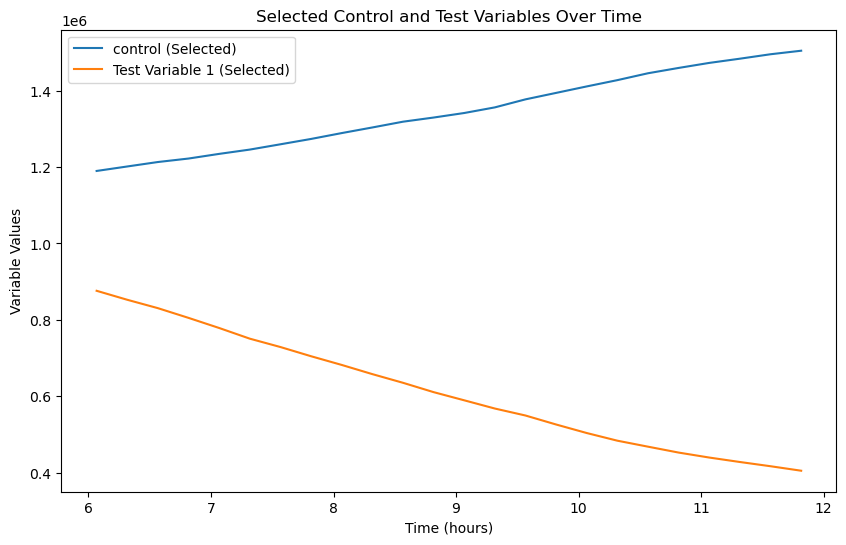

In [179]:
#plot the data
plt.figure(figsize=(10, 6))
plt.plot(selected_rows['Time (hours)'], selected_rows['control'], label='control (Selected)')
plt.plot(selected_rows['Time (hours)'], selected_rows['Test Variable 1'], label='Test Variable 1 (Selected)')
plt.xlabel('Time (hours)')
plt.ylabel('Variable Values')
plt.title('Selected Control and Test Variables Over Time')
plt.legend()
plt.show()

In [180]:
#we now need to complete another nomalisation to the first selected time point. 
normalized_data = selected_rows.copy()

In [182]:
#select the collums we want to normalise
normalize_columns = ['control', 'Test Variable 1']

In [183]:
#normalise the collumns independently of each other and based on the first time point value in each collumn. 
for column in normalize_columns:
    normalized_data[column] = normalized_data[column] / normalized_data[column].iloc[0]

In [184]:
#display the normalisation values
print(normalized_data)

    Time (hours)   control  Test Variable 1
24      6.066667  1.000000         1.000000
25      6.316667  1.009863         0.973142
26      6.566667  1.019668         0.948077
27      6.816667  1.027331         0.919013
28      7.066667  1.037578         0.888772
29      7.316667  1.047039         0.856858
30      7.566667  1.058689         0.831859
31      7.816667  1.070455         0.804336
32      8.066667  1.083360         0.778359
33      8.316667  1.095716         0.750878
34      8.566667  1.108419         0.724972
35      8.816667  1.117561         0.697016
36      9.066667  1.127554         0.672571
37      9.316667  1.139941         0.647967
38      9.566667  1.157597         0.627111
39      9.816667  1.171818         0.600235
40     10.066667  1.186071         0.574730
41     10.316667  1.199907         0.551824
42     10.566667  1.215056         0.533944
43     10.816667  1.226776         0.516282
44     11.066667  1.237843         0.501418
45     11.316667  1.247119      

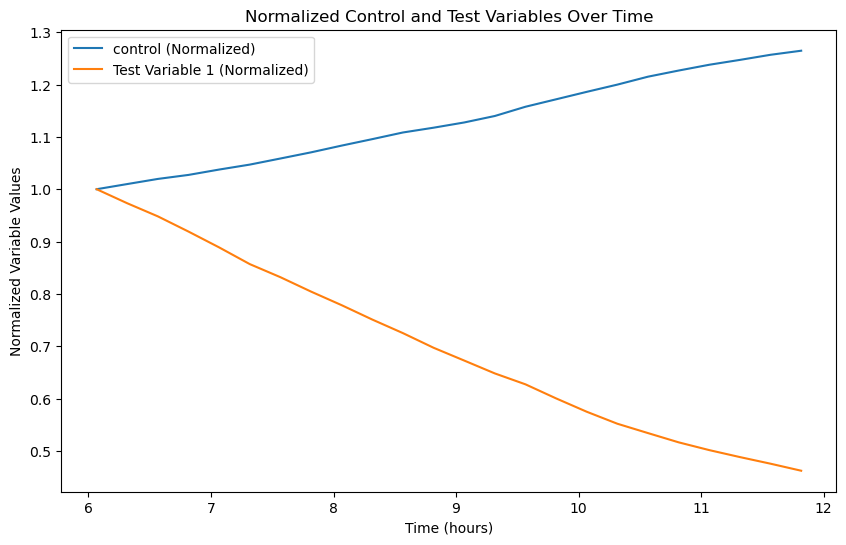

In [185]:
#visulise the normalisation
plt.figure(figsize=(10, 6))
plt.plot(normalized_data['Time (hours)'], normalized_data['control'], label='control (Normalized)')
plt.plot(normalized_data['Time (hours)'], normalized_data['Test Variable 1'], label='Test Variable 1 (Normalized)')
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Variable Values')
plt.title('Normalized Control and Test Variables Over Time')
plt.legend()
plt.show()

In [186]:
#finally we want to persom a last rolling average.
#this code selects the rowa we have been using previosuly 
rolling_average_data = selected_rows.copy()

In [187]:
#this defines the collumns for which the rolling average will be performed
rolling_columns = ['control', 'Test Variable 1']

In [188]:
#this calculates the rolling average with a window size of three
for column in rolling_columns:
    rolling_average_data[column] = rolling_average_data[column].rolling(window=3, min_periods=1).mean()

In [189]:
#display the results
print(rolling_average_data)

    Time (hours)       control  Test Variable 1
24      6.066667  1.189791e+06    875943.033333
25      6.316667  1.195658e+06    864180.050000
26      6.566667  1.201503e+06    852940.400000
27      6.816667  1.212342e+06    829293.788889
28      7.066667  1.223333e+06    804659.333333
29      7.316667  1.234189e+06    778025.122222
30      7.566667  1.246625e+06    752577.644444
31      7.816667  1.259665e+06    727924.055556
32      8.066667  1.274069e+06    705004.044444
33      8.316667  1.288754e+06    681359.355556
34      8.566667  1.303810e+06    658186.555556
35      8.816667  1.317374e+06    634435.977778
36      9.066667  1.330001e+06    611571.744444
37      9.316667  1.342503e+06    589087.511111
38      9.566667  1.358381e+06    568676.344444
39      9.816667  1.375936e+06    547555.566667
40     10.066667  1.394231e+06    526171.877778
41     10.316667  1.411011e+06    504189.633333
42     10.566667  1.428159e+06    484833.866667
43     10.816667  1.444302e+06    467768

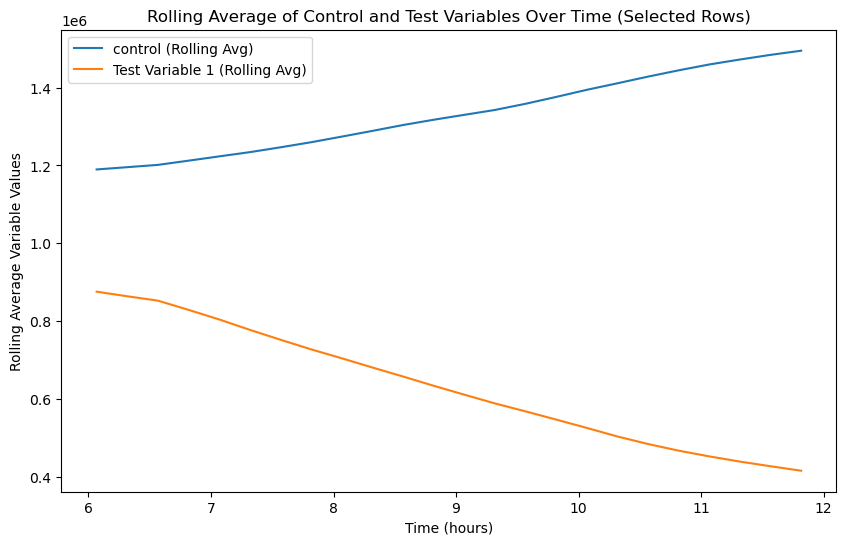

In [190]:
#plot the results in a line graoh to visulise the results.
#the results display the rate of cell death or cell growth over the period at which immune cells are working most efficently to remove them. 
plt.figure(figsize=(10, 6))
plt.plot(rolling_average_data['Time (hours)'], rolling_average_data['control'], label='control (Rolling Avg)')
plt.plot(rolling_average_data['Time (hours)'], rolling_average_data['Test Variable 1'], label='Test Variable 1 (Rolling Avg)')
plt.xlabel('Time (hours)')
plt.ylabel('Rolling Average Variable Values')
plt.title('Rolling Average of Control and Test Variables Over Time (Selected Rows)')
plt.legend()
plt.show()